In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs

In [2]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:36029 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [3]:
import cosima_cookbook as cc
session = cc.database.create_session()

In [4]:
expt = '01deg_jra55v13_ryf9091'
vars_025deg = cc.querying.get_variables(session, experiment='01deg_jra55v13_ryf9091')
vars_025deg[vars_025deg['name'].str.lower().str.match('')]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
0,SALT,None,None,restart515/ice/monthly_sstsss.nc,32,None,None
1,TEMP,None,None,restart515/ice/monthly_sstsss.nc,32,None,None
2,Tsfcn,None,None,restart515/ice/iced.2030-01-01-00000.nc,32,None,None
3,aice_io,None,None,restart515/ice/i2o.nc,32,None,None
4,aicen,None,None,restart515/ice/iced.2030-01-01-00000.nc,32,None,None
...,...,...,...,...,...,...,...
374,time,time,static,output1075/ocean/ocean_grid.nc,1076,1900-04-01 00:00:00,2170-01-01 00:00:00
375,xt_ocean,tcell longitude,static,output1075/ocean/ocean_grid.nc,1076,1900-04-01 00:00:00,2170-01-01 00:00:00
376,xu_ocean,ucell longitude,static,output1075/ocean/ocean_grid.nc,1076,1900-04-01 00:00:00,2170-01-01 00:00:00
377,yt_ocean,tcell latitude,static,output1075/ocean/ocean_grid.nc,1076,1900-04-01 00:00:00,2170-01-01 00:00:00


In [5]:
eta = cc.querying.getvar(expt,'eta_t',session,start_time='2005-01-01',end_time='2010-12-31',frequency = '1 daily').sel(xt_ocean=slice(-90,10)).sel(yt_ocean = slice(20,50))

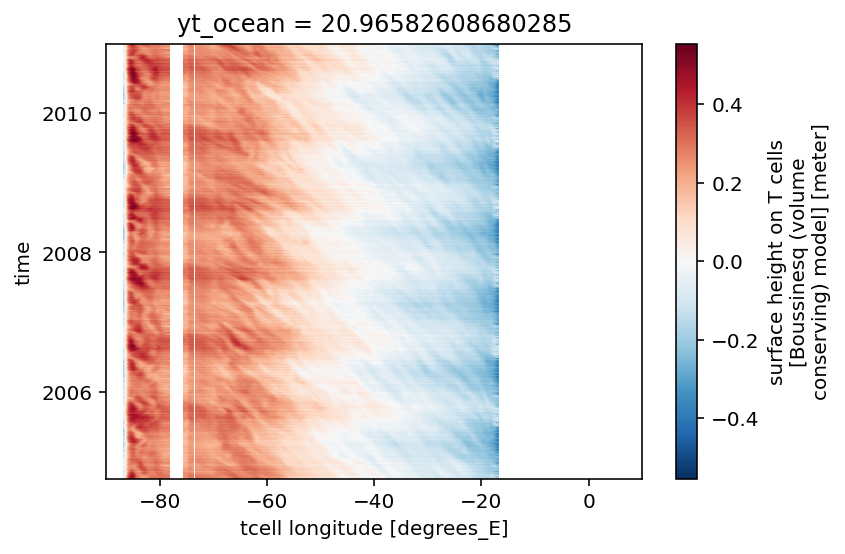

In [11]:
eta.sel(yt_ocean = 21, method = 'nearest').mean('yt_ocean').plot()

Text(0.5, 1.0, 'Latitude 50')

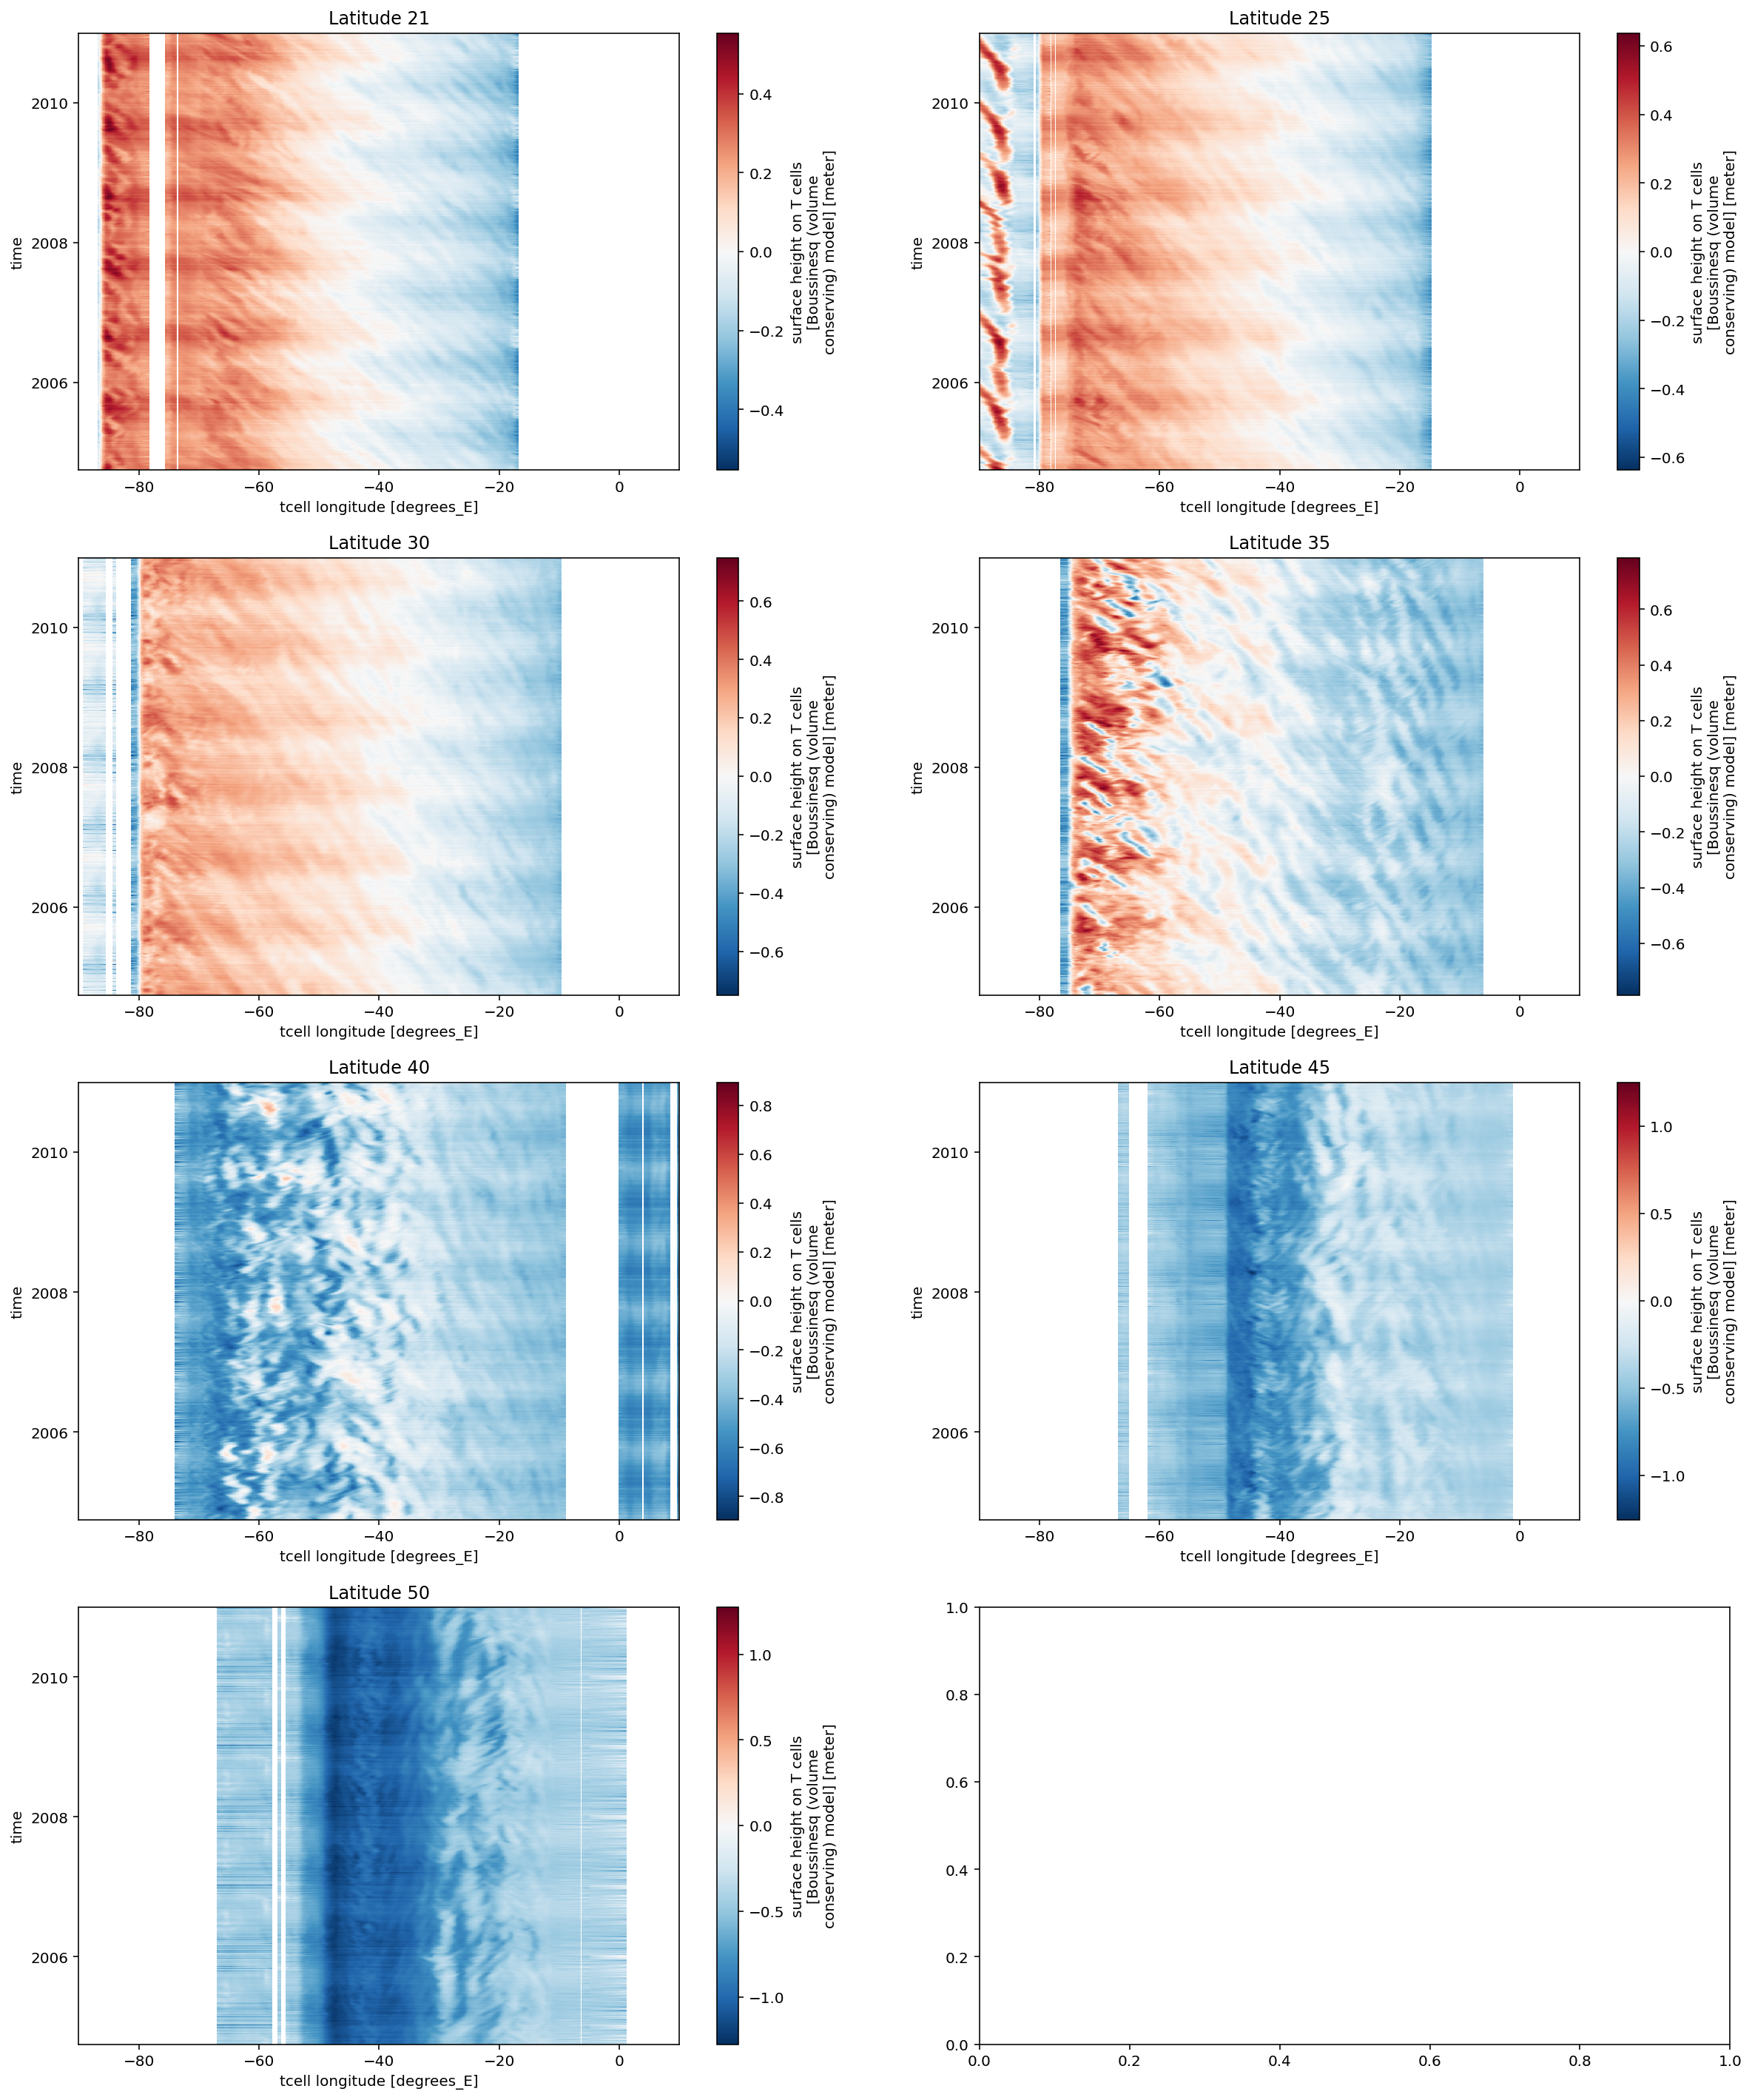

In [15]:
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(20,25))

eta.sel(yt_ocean = 21, method = 'nearest').plot(ax = axes[0][0])
axes[0][0].set_title('Latitude 21')

eta.sel(yt_ocean = 25, method = 'nearest').plot(ax = axes[0][1])
axes[0][1].set_title('Latitude 25')

eta.sel(yt_ocean = 30, method = 'nearest').plot(ax = axes[1][0])
axes[1][0].set_title('Latitude 30')

eta.sel(yt_ocean = 35, method = 'nearest').plot(ax = axes[1][1])
axes[1][1].set_title('Latitude 35')

eta.sel(yt_ocean = 40, method = 'nearest').plot(ax = axes[2][0])
axes[2][0].set_title('Latitude 40')

eta.sel(yt_ocean = 45, method = 'nearest').plot(ax = axes[2][1])
axes[2][1].set_title('Latitude 45')

eta.sel(yt_ocean = 50, method = 'nearest').plot(ax = axes[3][0])
axes[3][0].set_title('Latitude 50')